## Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Test set Image Processing

In [3]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Pneumonia_Project/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 624 files belonging to 2 classes.


## Loading Model

In [7]:
cnn = tf.keras.models.load_model('/content/trained_model.h5')

## Visualising and Performing Prediction on Single image

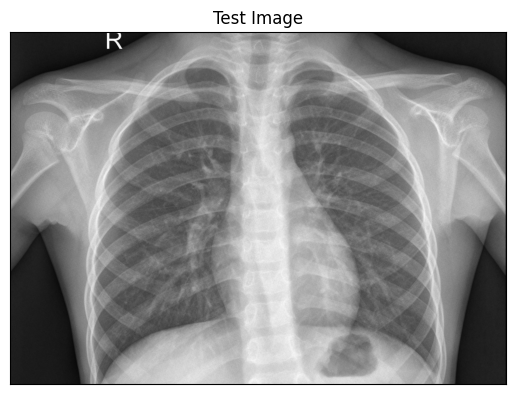

In [8]:
#Test Image Visualization
import cv2
image_path = '/content/drive/MyDrive/Pneumonia_Project/test/NORMAL/IM-0001-0001.jpeg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [9]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 413ms/step


In [10]:
print(predictions)

[[0.9946214  0.00537863]]


In [11]:
# test_set.class_names

In [12]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

0


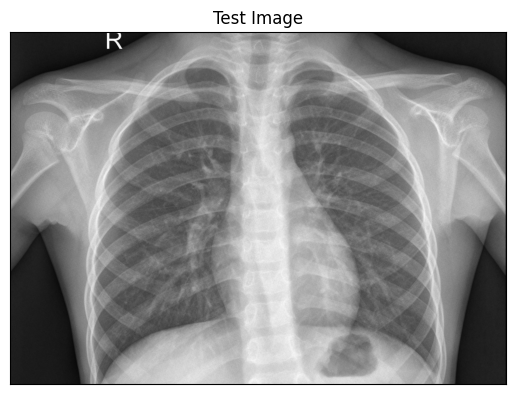

In [13]:
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [14]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))

It's a NORMAL
